In [2]:
import numpy as np
#we will load the wine data from scikit-learn package
from sklearn.datasets import load_wine
wine = load_wine()
#check the shape of wine data
print(wine.data.shape)
A = wine.data
#Normalize columns of A so that all entries are in the range [-1,+1] 
for i in range(A.shape[1]):
    A[:,i] = -1+(((A[:,i]-min(A[:,i]))*2)/(max(A[:,i])-min(A[:,i]))) # USing the formula for custom range normalization
#check the shape of wine target
print(wine.target.shape)
#How many labels does wine data have?
num_of_classes = len(np.unique(wine.target))
C=num_of_classes
print(C)
n = wine.data.shape[0] #Number of data points
d = wine.data.shape[1] #Dimension of data points

(178, 13)
(178,)
3


In [3]:
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])
for i in range(wine.target.shape[0]):
  if wine.target[i]!=1:
    y[i] = -1 # Convert class labels that are not 1 into -1
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
print(indexarr) #check indexarr after shuffling

[167   9  93  52  18  84  97  50  80   4   3  53 168 148 122 156  44 100
  25  31 161 154  63 175  32  61  69 170 157  67   7 127  60  85 146 126
  43  13 158 128  56 115  14  38   1 133  92 101  34 130   0 119  26 151
 109  36  45  17  86 143  79  62 152 173  57  70 131  30  95  51  16  24
  10 110 160 113 166  59  73 141 147 104  75 112 121 123  20  77  89 106
 124  54 132 138  37 120  91 105 114  83  76  19  68 176 171  96 125  90
 145   5  64 174  98  41  29  46 149 155 103 102  42  23 136 129 163 107
 177  94  82  66  27 153 117  22 169  71 134  12 137 108  15 135  39  72
 162 139   2  58  81  33  65  55  28  88 172  35 150 142  21  87  74 165
  78 140  40 116 111 159 118  11  48 144   8  49  99   6  47 164]


In [4]:
train_data = []
train_label = []
test_data = []
test_label = []
count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count = count + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [5]:
def predict(w,x):
  h = np.matmul(w.T, x)
  if h > 0:
    return 1
  elif  h < 0:
    return -1

In [6]:
def compute_accuracy(data,labels,model_w):
  c = 0
  n = len(data[0])
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      c = c + 1
  return c/n 

#Q3.

In [7]:
def compute_loss_h(w,x,y):
  z = np.zeros(len(y))
  #print(w.shape)
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  #print(z)
  loss = [0 if z[i]>=1 else (1-z[i]) for i in range(len(z))]
  return np.array(loss)

def compute_objfnval(data,labels,model_w):
  return np.mean(compute_loss_h(model_w,data,labels))+ (lamda/2)*np.linalg.norm(model_w,2)**2

In [8]:
def compute_grad_loss_h(x,y,model):
  x = np.reshape(x,(d,1))
  model_w = np.reshape(model, (d,1))
  z = (y*np.matmul(model_w.T, x)).item()
  if z >=1:
    grad = (lamda/n)*model
  if z <1:
    grad = ((1/n)*(-y*x) + (lamda/n)*model)
  return grad

#Q4.

In [22]:
def compute_orthogonal_projection(z):
  t=len(z)
  ortho_proj = np.ones(t)
  for i in range(t):
    if abs(z[i][0])<=1:
      ortho_proj[i]=(z[i][0]) #that component of z will remain as it is.
    elif (z[i][0])<-1:
      ortho_proj[i]=-1
    else:
      ortho_proj[i]=1
  return ortho_proj

#Q5.

In [15]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = compute_orthogonal_projection(w-step * compute_grad_loss_h(data[i], label[i], w))
      t = t+1
    fval_array.append(compute_objfnval(data,label,w))
    test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
    train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

#Q6.

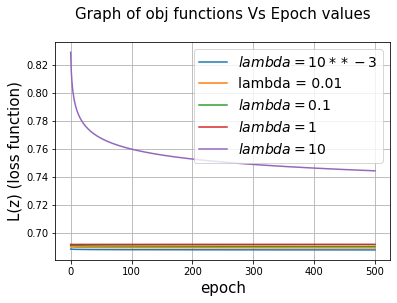

In [23]:
import matplotlib.pyplot as plt
num_epochs = 500
lambda_arr = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
epochs = np.linspace(0,500,500)
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, fval_array,label= r'$ $')
plt.grid()
plt.title('Graph of obj functions Vs Epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

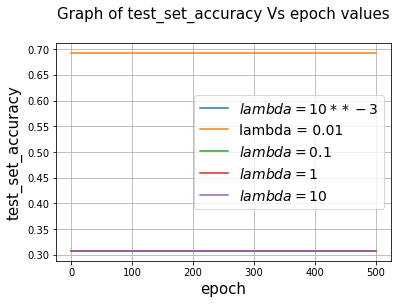

In [24]:
data = train_data
label = train_label
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, test_set_accuracy_array,label= r'$ $') 
plt.grid()
plt.title('Graph of test_set_accuracy Vs epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'test_set_accuracy',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

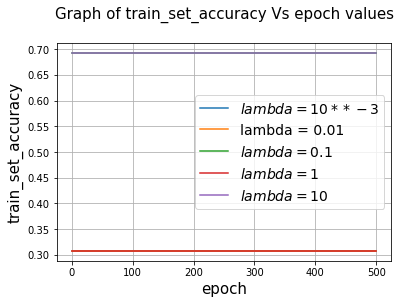

In [25]:
data = train_data
label = train_label
train_accuracy = []
test_accuracy = []
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  train_accuracy.append(train_set_accuracy_array)
  test_accuracy.append(test_set_accuracy_array)
  plt.plot(epochs, train_set_accuracy_array,label= r'$ $') 
plt.grid()
plt.title('Graph of train_set_accuracy Vs epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'train_set_accuracy',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

In [26]:
from tabulate import tabulate
data = [[lambda_arr[i],test_accuracy[i][-1],train_accuracy[i][-1]] for i in range(len(lambda_arr))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 | 0.3076923076923077  |  0.3076923076923077  |
| 0.01  | 0.3076923076923077  |  0.3076923076923077  |
|  0.1  | 0.6923076923076923  |  0.6923076923076923  |
|   1   | 0.3076923076923077  |  0.3076923076923077  |
|  10   | 0.6923076923076923  |  0.6923076923076923  |
+-------+---------------------+----------------------+


#Q7.

For Logistic:

In [19]:
def compute_loss_l(w,x,y):
  w = np.reshape(w, [d,1])
  loss_l = np.log(np.add(1, np.exp(-np.dot(y, np.dot((x),w)))))
  return loss_l

def compute_objfnval_l(data,labels,w):
  a = np.multiply(lamda/2 , np.linalg.norm(w)**2)
  b = sum(compute_loss_l(w,data[i],labels[i]) for i in range(data.shape[0]))
  fval_l = np.add(a, b/data.shape[0])
  return fval_l

def compute_grad_loss_l(x,y,model_w):
  x = np.reshape(x, [d,1])
  model_w = np.reshape(model_w, [d,1])
  z = (y*np.matmul(model_w.T, x)).item()
  #print(z)
  grad = -((1/n)* y*x* np.exp(-z))/(1+np.exp(-z)) + (lamda/n)*model_w
  return grad

In [20]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = compute_orthogonal_projection(np.subtract(w , step * compute_grad_loss_l(data[i], label[i], w)))
      t = t+1
    fval_array.append(compute_objfnval_l(data,label,w))
    test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
    train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

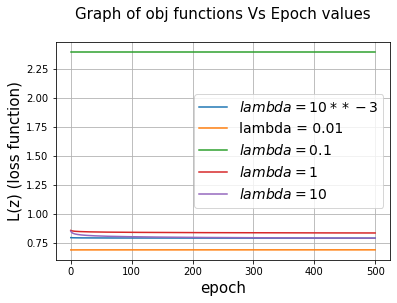

In [27]:
import matplotlib.pyplot as plt
num_epochs = 500
lambda_arr = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
epochs = np.linspace(0,500,500)
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, fval_array,label= r'$ $')
plt.grid()
plt.title('Graph of obj functions Vs Epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

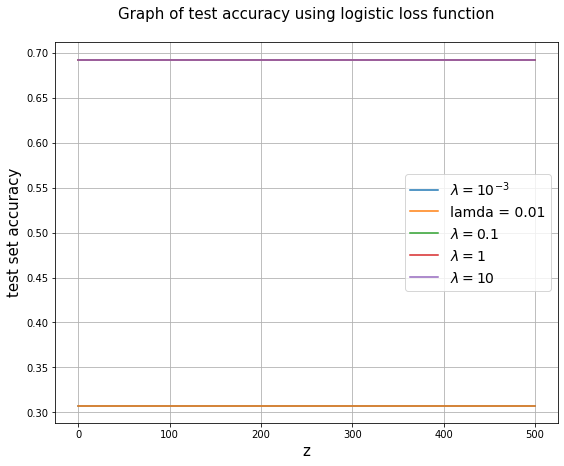

In [28]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda,num_epochs)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of test accuracy using logistic loss function\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'test set accuracy',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lamda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

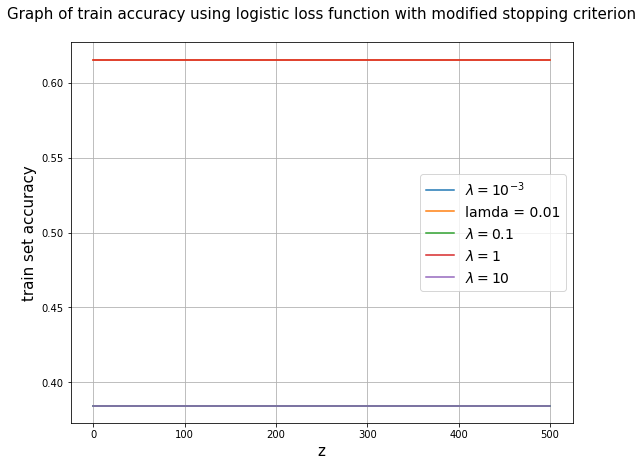

In [148]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda,num_epochs)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of train accuracy using logistic loss function\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'train set accuracy',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lamda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [149]:
Test_set_accuracy = []
Train_set_accuracy = []
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
print("Using logistic loss function")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda,num_epochs)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using logistic loss function with modified stopping criterion
   Lambda  Test set accuracy  Train set accuracy
0   0.001           0.230769            0.384615
1   0.010           0.769231            0.615385
2   0.100           0.769231            0.615385
3   1.000           0.230769            0.384615
4  10.000           0.769231            0.615385


Observations: The final test set is higher for lamda = 0.01,0.1,10 and the same applies for the train set accuracy. However function minimizes significantly than the others for lamda = 1 and 10 as clear from the function value graph.

Squared Hinge:

In [150]:
def compute_loss_sh(w,x,y):
  w = np.reshape(w, [d,1])
  a = np.subtract(1, np.dot(y, np.dot(np.transpose(x),w)))
  loss_sh = max(0, a)**2
  return loss_sh

def compute_objfnval_sh(data,labels,w):
  a = np.multiply(lamda/2 , np.linalg.norm(w)**2)
  b = sum(compute_loss_sh(w,data[i],labels[i]) for i in range(data.shape[0]))
  fval_sh = np.add(a, b/data.shape[0])
  return fval_sh

def compute_grad_loss_sh(x,y,model_w, lam):
 x = np.reshape(x, [d,1])
 model_w = np.reshape(model_w, [d,1])
 z = (y*np.matmul(model_w.T, x)).item()
 if z >=1:
   grad = (lam/n)*model_w
 if z <1:
   grad = ((2/n)*(-y* x)*(1-z) + (lam/n)*model_w)
 return grad

In [151]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = compute_orthogonal_projection(np.subtract(w , step * compute_grad_loss_sh(data[i], label[i], w,lamda)))
      t = t+1
    fval_array.append(compute_objfnval_sh(data,label,w))
    test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
    train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

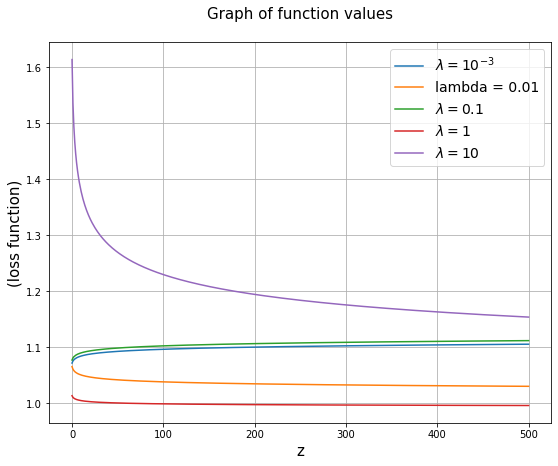

In [152]:
num_epochs = 500
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs,fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of function values\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(loss function)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

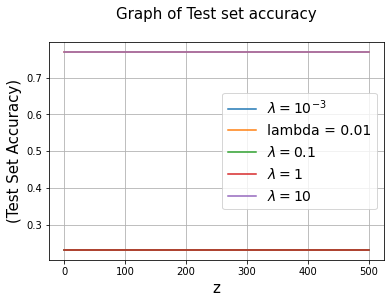

In [153]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Test set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Test Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

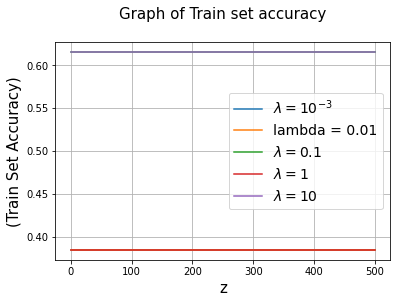

In [154]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Train set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Train Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [155]:
lambda_set = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
Test_set_accuracy = []
Train_set_accuracy = []
print("Using squared hinge loss function:")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using squared hinge loss function:
   Lambda  Test set accuracy  Train set accuracy
0   0.001           0.769231            0.615385
1   0.010           0.230769            0.384615
2   0.100           0.230769            0.384615
3   1.000           0.769231            0.615385
4  10.000           0.769231            0.615385


Here , function has higher similar test and train set accuracies for lamda = 0.001,1,10 and the function minimizes for lamda = 1 .